In [1]:
print("HW")

HW


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing
california_df = fetch_california_housing()

In [4]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target

In [5]:
df.shape

(20640, 9)

We have many records, hyperparamenter tuning takes time.

In [6]:
df = df.sample(frac=0.25)
df.shape

(5160, 9)

In [8]:
X = df.drop(columns="Target")
y = df['Target']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Without hyperparameter tuning

In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
score

0.48914913301357155

# With hyper parameter tuning

In [12]:
parameters = {
                 'criterion' : ('squared_error','friedman_mse','absolute_error','poisson'),
                 'splitter' : ('best','random'),
                 'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                 'max_features':('auto', 'sqrt', 'log2')
             }

In [14]:
regressor = DecisionTreeRegressor()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorCV = GridSearchCV(regressor,param_grid=parameters,cv=2,scoring='neg_mean_squared_error')

In [16]:
regressorCV.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')},
             scoring='neg_mean_squared_error')

In [18]:
regressorCV.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [19]:
regressor = DecisionTreeRegressor(criterion =  'poisson', max_depth = 6, max_features = 'log2', splitter =  'best')

In [20]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='log2')

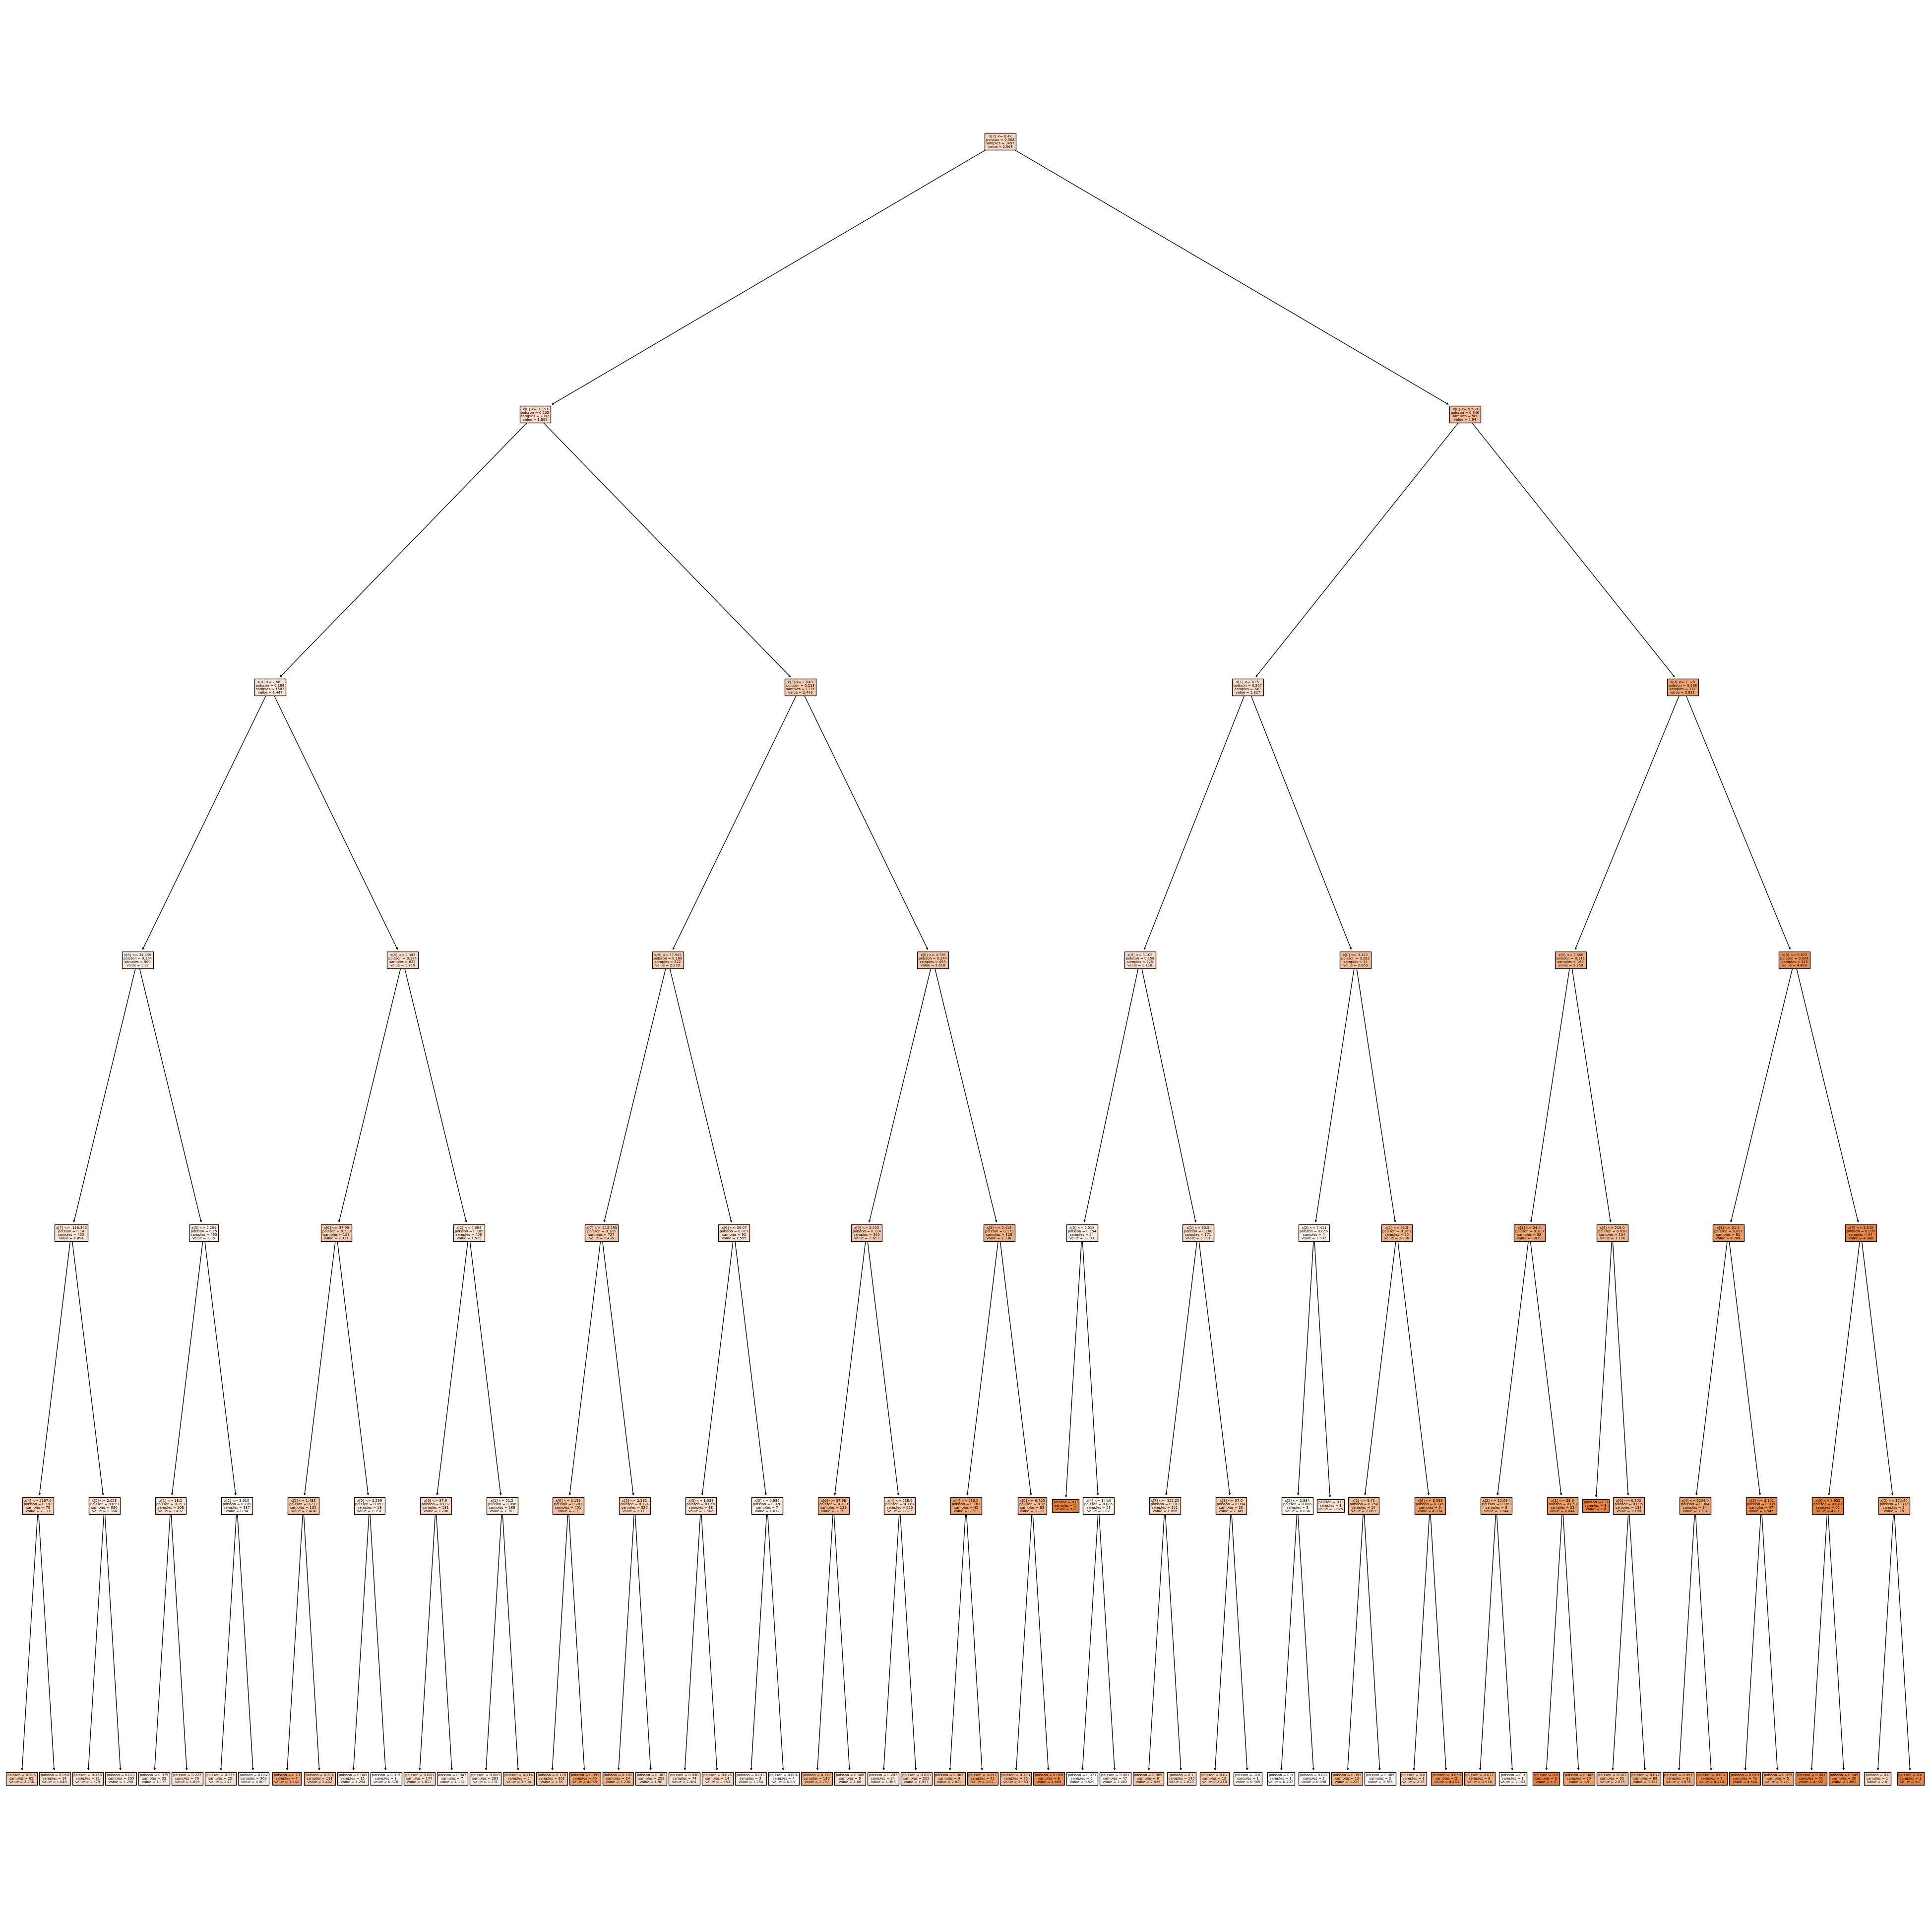

In [23]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(regressor,filled=True)
plt.show()